**NOMBRES:**

Estudiante 1

Estudiante 2


**MÉTRICAS EN LA CLASIFICACIÓN DE DATOS**





**Yomin Jaramillo M**

https://towardsdatascience.com/understanding-the-confusion-matrix-from-scikit-learn-c51d88929c79

En un problema de clasificación , buscamos entrenar un modelo capaz de asignar clases especificas a un conjunto de de datos.
Según lo estudidado, partimos de un un conjunto de datos de entrenamiento que permite hacer un aprendizaje inicial de los datos, y posteriormente, probamos que tan bien aprendió el modelo haciendo uso del conjunto de test, el cual es un conjunto de datos que nunca fue visto por el modelo.

En este  notebook exploraremos conceptualmente algunas metricas de clasificación que indican que tan bien funciona el modelo en los datos nuevos. Para esto, exploraremos el modelo de perceptrón simple que ya conocemos

**Implementación del modelo de clasificación - Perceptrón simple**

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np


Cargamos nuestros datos, en este caso los datos serán generado por un función de numpy de distribuye los datos para que sean linealmente separables

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

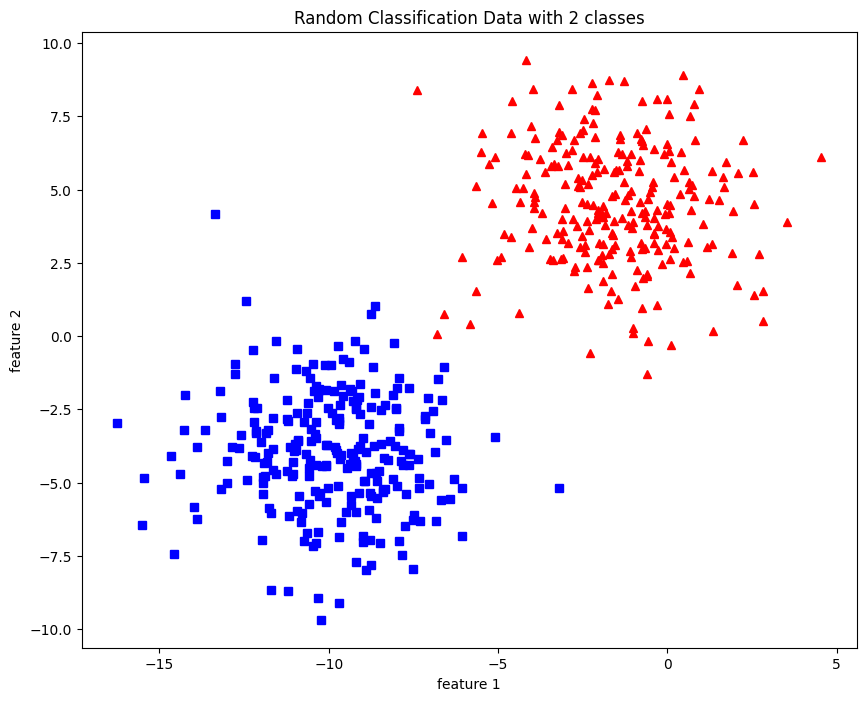

In [ ]:
X, y = datasets.make_blobs(n_samples=500,n_features=2,
                           centers=2,cluster_std=2.05, random_state=1)
#Plotting
y[y==0]=-1
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

**Definimos la función de activación**

In [ ]:
def step_func(z):
        return 1.0 if (z > 0) else -1.0

**DIVSIÓN DE DATOS**

In [ ]:
X.shape
X_train, X_test, y_train, y_test = X[:400], X[400:], y[:400], y[400:]

In [ ]:
#unos=np.ones(len(X_test))
#X_test=np.insert(X_test, 0, unos, axis=1)

**Función de perceptron**

In [ ]:

def perceptron(X, y, lr, epochs):

    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    # m-> number of training examples
    # n-> number of features
    m, n = X.shape
    theta = np.zeros((n+1,1))# se inicializa Theta con el número de features +1 que hace referencia al bias

    # Empty list to store how many examples were
    # misclassified at every iteration.
    n_miss_list = [] #se inicia una lista para guardar cuantos ejemplos quedan mal clasificados por epoch
    #loss_list=[]
    # Training.
    for epoch in range(epochs):
        n_miss = 0 # se crea una variable para contar las muestras mal clasificadas
        for idx, x_i in enumerate(X): #ciclo for iteractivo por todas la muestras
            x_i = np.insert(x_i, 0, 1).reshape(-1,1) # Se inserta un 1 en la muestra para operar el bias con producto punto, en este caso X0 = 1.
            y_hat = step_func(np.dot(x_i.T, theta)) # Calculo de prediction/hypothesis.
            #if (np.squeeze(y_hat) - y[idx]) != 0:
            if (np.squeeze(y_hat)*(-y[idx])) != -1: #si suma a la funcipon de costo, esta mal clasificada
                #theta += lr*((y[idx] - y_hat)*x_i)
                theta += lr*(y[idx]*x_i) #ajusta los parametros en caso de que se cumpla la condición
                # Incrementing by 1.
                n_miss += 1 #cuenta el dato mal clasificado

        n_miss_list.append(n_miss) #añade la cantidad de muestras mal etiquetadas de cada epoca a una lista para graficar el error

    return theta, n_miss_list

def prediction(x,theta):
  predictions=[]
  for idx, x_i in enumerate(x): #ciclo for iteractivo por todas la muestras
            x_i = np.insert(x_i, 0, 1).reshape(-1,1) # Se inserta un 1 en la muestra para operar el bias con producto punto, en este caso X0 = 1.
            y_hat = step_func(np.dot(x_i.T, theta)) # Calculo de prediction/hypothesis.
            predictions.append(y_hat)
  return predictions


def plot_decision_boundary(X, theta):

    # X --> Inputs
    # theta --> parameters

    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    print(x1)
    print(theta)
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c

    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("Perceptron Algorithm")
    plt.plot(x1, x2, 'y-')


[-16.257929483527025, 4.553697174414142]
[[-28.        ]
 [ -4.19905614]
 [ -7.82044138]]


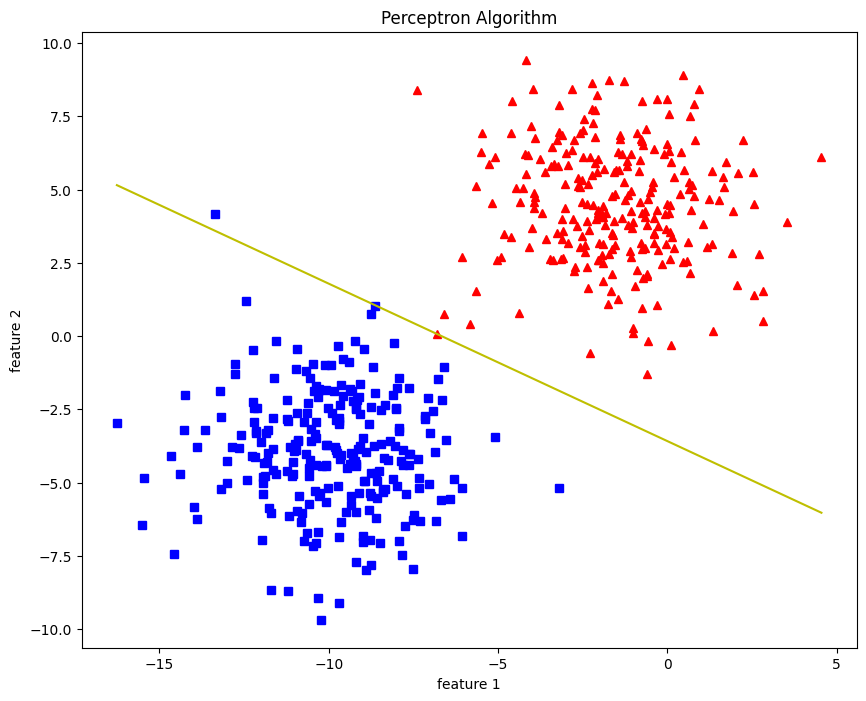

In [ ]:
theta, miss_l = perceptron(X_train, y_train, 0.25, 1000)
plot_decision_boundary(X, theta)

In [ ]:
y_hat = np.array(prediction(X_test, theta))
y_hat
#unos=np.ones(X_test.shape(0))

array([-1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,
       -1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
       -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1.,
       -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,
       -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,
        1., -1., -1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.])

En este punto  $̂\hat{y}$   contiene la predicción de todas las muestras del conjunto de test.

Tenga en cuenta que usted tiene el valor de la predicción, y el valor real de datos nunca vistos por el modelo, por lo tanto, podemos saber que tan buena fue la predicción del modelo en los valores nuevos.

Todas las medidas de desempeño se toman con respecto a los valores reales de Test (y_test) y los valores predichos por el modelo.

**ACCURACY**

La Exactitud o el Accuracy es la medida más simple y común que se extrae de los modelos de clasificación, la cual se basa en determinar cuantas muestras del total fueron clasificadas de forma adecuada.



$\frac{1}{n}\sum_{i=0}^{n} if (\hat{y}_{i}==y_{i})$

Donde $n$ es el numero total de muestras en el conjunto de test.
La extracción del indice de desempeño puede extraerse de forma manual con la fórmula presentada, mediante la matriz de confusión o por métodos de python que automatizan su extracción.

En este caso se usará el método accuracy_score que se extrae de  sklearn.metrics

In [ ]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test, y_hat)
print("El accuracy del modelo es: ", str(acc*100)+"%")

El accuracy del modelo es:  99.0%


**MATRIZ DE CONFUSIÓN**

Una matriz de confusión es una herramienta que se utiliza en el campo de la estadística y el aprendizaje automático para evaluar el rendimiento de un modelo de clasificación. Proporciona una representación visual de las predicciones realizadas por el modelo en comparación con los valores reales de las etiquetas.

Una matriz de confusión se compone de una tabla cuadrada que muestra diferentes métricas relacionadas con las predicciones del modelo. Por lo general, está dividida en filas y columnas, donde cada fila representa las clases reales de las muestras y las columnas representan las clases predichas por el modelo. Esta asociación puede variar.

La matriz de confusión se compone de los siguientes elementos:

Verdaderos positivos (TP): Representa la cantidad de muestras que el modelo ha predicho positivas y en realidad eran positivas. (Predichas correctamente positivas)

Verdaderos negativos (TN): Representa la cantidad de muestras que el modelo ha predicho negativas y en realidad eran negativas. (Predichas correctamente negativas)

Falsos positivos (FP): Representa la cantidad de muestras que el modelo ha predicho positivas y en realidad eran negativas. (Predichas erroneamente positivas)

Falsos negativos (FN): Representa la cantidad de muestras que el modelo ha predicho negativass y en realidad eran positivas. (Predichas erroneamente negativas)

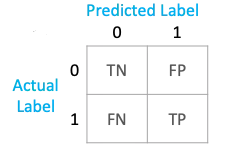

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
CM = confusion_matrix(y_test, y_hat, labels=[1, -1])
CM

array([[56,  1],
       [ 0, 43]])

A partir de la matriz de confunsión se pueden hallar algunas métricas adicionales que ayudan a hacer un mejor analisis del clasificador.

1. **Accuracy**
$$Acc=\frac{TP+TN}{TP+TN+FP+FN} $$

2. **Sensibilidad:**   tambien es conocida como la tasa de verdaderos positivos, es una métrica utilizada en el campo del aprendizaje automático para evaluar el rendimiento de un modelo de clasificación, especialmente cuando se trata de la detección de casos positivos.

  La sensibilidad nos dice qué tan bueno es el modelo para encontrar los casos positivos verdaderos en relación con todos los casos positivos que existen en los datos de prueba. Es una medida importante cuando se quiere minimizar los falsos negativos, es decir, los casos positivos que se clasifican erróneamente como negativos.

$$Sensivility= \frac{TP}{TP+FN}$$

3. **Especificidad:**  La especificidad representa justamente el caso contrario a la sensibilidad, ya que puede ser vista como la Tasa de verdaderos negativos.

  La especificidad nos indica qué tan bueno es el modelo para identificar los casos negativos verdaderos en relación con todos los casos negativos existentes en los datos de prueba. Es una medida importante cuando se desea minimizar los falsos positivos, es decir, los casos negativos que se clasifican erróneamente como positivos.

$$Specificity=\frac{TN}{TN+FP}$$

4. **Presición:**  La precisión se define como la proporción de casos positivos predichos correctamente por el modelo en relación con todos los casos positivos predichos.  

  La precisión nos indica qué tan bueno es el modelo para identificar correctamente los casos positivos en relación con todos los casos que ha clasificado como positivos. Es una medida importante cuando se desea minimizar los falsos positivos, es decir, los casos negativos que se clasifican erróneamente como positivos.

$$Precision=\frac{TP}{TP+FP}$$


5. **F1-Score:**Es una medida que combina la precisión y la sensibilidad en una única puntuación, proporcionando una medida equilibrada del rendimiento general del modelo.

  El F1-score es especialmente útil cuando las clases están desequilibradas en los datos de prueba, es decir, cuando hay una diferencia significativa en el número de instancias entre las clases positivas y negativas. En estos casos, utilizar solo la precisión o la sensibilidad podría ser engañoso, ya que un modelo puede obtener un alto rendimiento en una métrica mientras que su rendimiento en la otra es bajo. El F1-score proporciona una medida equilibrada que considera tanto los falsos positivos como los falsos negativos.

  $$F1-Score=\frac{2*(Precision*Sensivility)}{(Precision+Sensivility)}$$


**TAREA 1:**

1. Encontrar todos los indicadores anteriormente descritos para el modelo actual teniendo en cuenta los resultados de la matriz de confusión.(Puedes usar la matriz de confusion o los módulos de Sklearn)


2. Hacer un análisis del resultado de las métricas

**EJEMPLO:**

In [ ]:
sensibility=CM[1][1]/(CM[1][1]+CM[1][0])
print(sensibility)


1.0
0.9824561403508771
